## Projeto: Analisando Vendas de Produtos Eletrônicos

<p style="text-align: justify;">
Este projeto tem como foco a análise de dados da empresa fictícia Nova Varejo que atua nos segmentos de eletrônicos e vestuário. Com um portfólio diversificado que inclui desde dispositivos móveis, computadores e acessórios tecnológicos de ponta até camisas, casacos e relógios, a empresa possui uma presença global, operando em múltiplos continentes por meio de canais online e lojas físicas. Seu público-alvo abrange desde consumidores individuais até pequenas e grandes empresas, o que demanda uma abordagem analítica abrangente e detalhada.

Este projeto de análise de vendas é dividido em seis etapas principais.​
</p>

<p style="text-align: justify;">
    
A [**Etapa 00 – Entendimento do Negócio**] consiste em compreender os objetivos da empresa, o problema a ser resolvido e quais decisões serão orientadas pelos dados.

Em seguida, a [**Etapa 01 – Importação e Tratamento dos Dados**] envolve a coleta de dados brutos, a verificação de sua qualidade e a aplicação de técnicas para corrigir inconsistências, remover duplicatas e padronizar os formatos.

Na [**Etapa 02 – Modelagem dos Dados**], os dados são organizados de forma estruturada, criando tabelas e relacionamentos que facilitam a análise, como tabelas fato e dimensão.

A [**Etapa 03 – Perguntas de Negócio**] traduz os objetivos em perguntas estratégicas que guiarão a análise, como identificar os produtos mais vendidos ou as lojas com melhor desempenho.

Já a [**Etapa 04 – Análise Descritiva**] utiliza ferramentas estatísticas e visuais para explorar os dados, identificar padrões, tendências e anomalias relevantes.

Por fim, a [**Etapa 05 – Relatório**] apresenta os resultados em formatos claros e objetivos, como dashboards, apresentações ou documentos, permitindo que os tomadores de decisão utilizem os insights obtidos de forma prática.
</p>

### 📝Etapa 00 - Entendimento do Negócio

<p style="text-align: justify;">
​Recém-contratado como Analista de Dados Júnior na empresa Nova Varejo, fui designado para realizar uma análise descritiva com base nas vendas das lojas físicas e da plataforma de e-commerce da empresa, no período de janeiro/20 a junho/22. A liderança quer entender melhor o comportamento dos clientes, desempenho dos produtos e lojas em diferentes regiões, otimizar estratégias de vendas e reduzir custos.

Objetivo:  Apresentar um relatório com insights que possam apoiar a tomada de decisões.
</p>


### 📥Etapa 01 - Importação e Tratamento dos Dados

#### Conjunto dos Dados​

Os dados foram disponibilizados em formato de arquivos csv extraídos do sistema da empresa. As tabelas são compostas pelas seguintes informações:

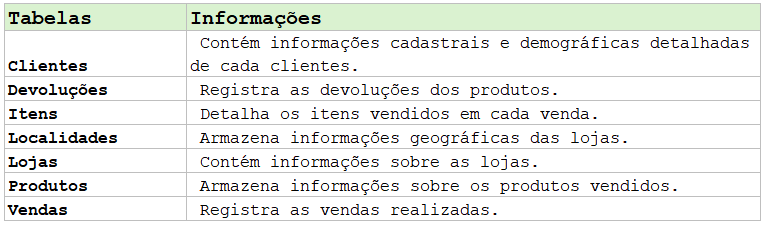

Dicionário de dados: <br>

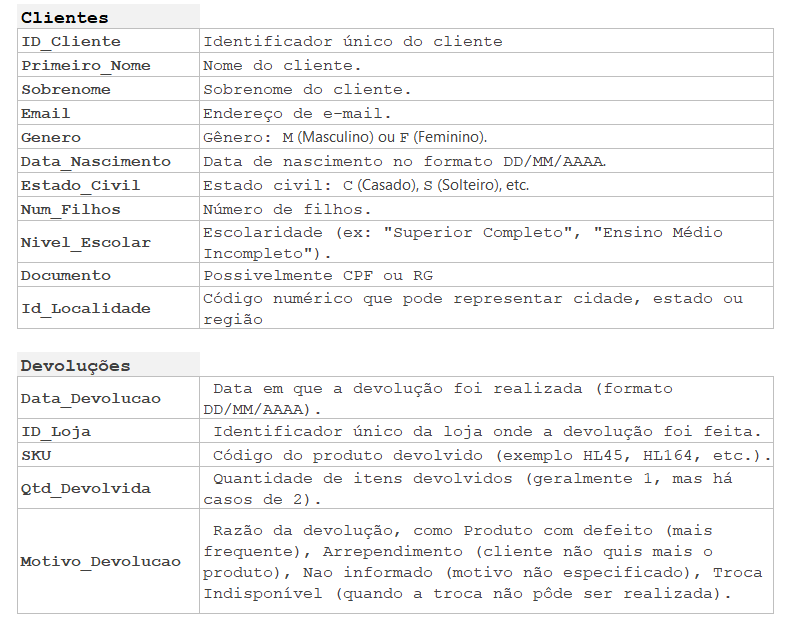

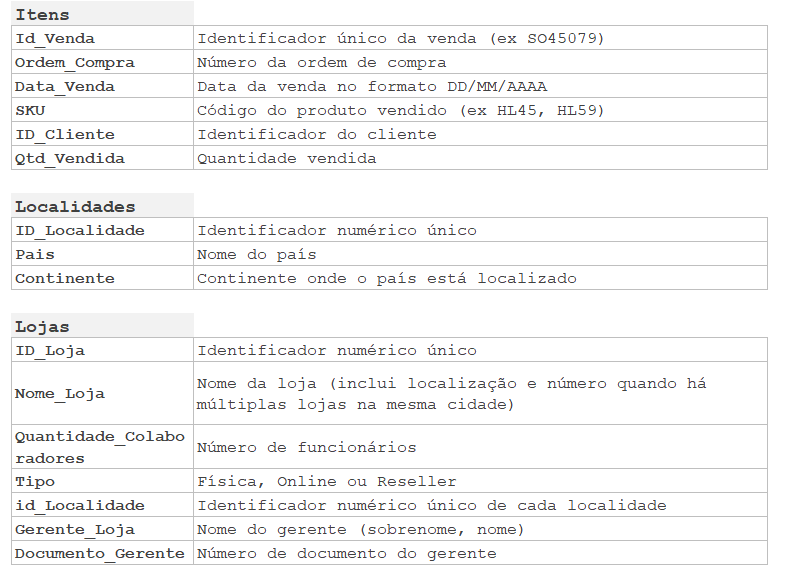

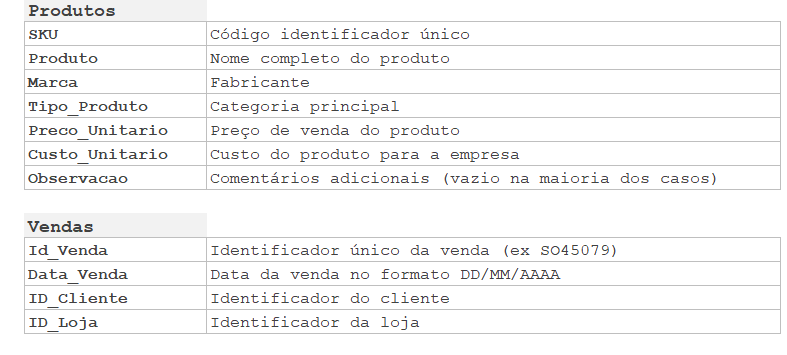



### Importando as Tabelas

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import sqlite3

# Configurações do banco de dados
database_path = "projeto_vendas_nova_varejo.db"
engine = create_engine(f"sqlite:///{database_path}")

# Pasta dos arquivos (caminho completo)
pasta_arquivos = r"C:\Users\Edutr\OneDrive\Área de Trabalho\Projeto Vendas Site Wix\dados"

# Lista dos arquivos (sem extensão)
arquivos = [
    "clientes", "devolucoes", "localidades", 
    "itens", "lojas", "vendas", "produtos"
]

for arquivo in arquivos:
    caminho_arquivo = os.path.join(pasta_arquivos, f"{arquivo}.csv")
    
    try:
        # Lê o CSV com delimitador ';' e encoding apropriado (utf-8 ou latin1)
        df = pd.read_csv(
            caminho_arquivo,
            sep=';',          # Delimitador ;
            encoding='utf-8',  # Ou 'latin1' se houver caracteres especiais
            decimal=',',       # Usar ',' como decimal (opcional, comum em PT-BR)
            thousands='.'     # Usar '.' como separador de milhares (opcional)
        )
        
        # Salva no banco de dados
        df.to_sql(
            arquivo,
            engine,
            if_exists='replace',
            index=False
        )
        print(f"✅ Tabela '{arquivo}' importada com sucesso!")
    except Exception as e:
        print(f"❌ Erro em '{arquivo}': {e}")

print("\n🎉 Todos os dados foram importados para o banco de dados!")

✅ Tabela 'clientes' importada com sucesso!
✅ Tabela 'devolucoes' importada com sucesso!
✅ Tabela 'localidades' importada com sucesso!
✅ Tabela 'itens' importada com sucesso!
✅ Tabela 'lojas' importada com sucesso!
✅ Tabela 'vendas' importada com sucesso!
✅ Tabela 'produtos' importada com sucesso!

🎉 Todos os dados foram importados para o banco de dados!


In [2]:
# carrega a extensão sql para Jupyter Notebook/IPython que permite executar SQL diretamente nas células.
%load_ext sql

In [3]:
# conectando ao banco de dados
%sql sqlite:///projeto_vendas_nova_varejo.db

### Tratamento dos dados
Agora iremos verificar como os dados estão dispostos em cada tabela do banco de dados. Trataremos possíveis valores duplicados, valores nulos, remoção de espaços vazios, verificação dos tipos de dados e totais de registros.

#### Verificação dos Tipos dos Dados

In [60]:
# tabela clientes
%sql PRAGMA table_info(Clientes);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID_Cliente,BIGINT,0,None,0
1,Primeiro_Nome,TEXT,0,None,0
2,Sobrenome,TEXT,0,None,0
3,Email,TEXT,0,None,0
4,Genero,TEXT,0,None,0
5,Data_Nascimento,TEXT,0,None,0
6,Estado_Civil,TEXT,0,None,0
7,Num_Filhos,BIGINT,0,None,0
8,Nivel_Escolar,TEXT,0,None,0
9,Documento,BIGINT,0,None,0


In [7]:
# tabela Devoluções
%sql PRAGMA table_info(Devolucoes);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Data_Devolucao,TEXT,0,None,0
1,ID_Loja,BIGINT,0,None,0
2,SKU,TEXT,0,None,0
3,Qtd_Devolvida,BIGINT,0,None,0
4,Motivo_Devolucao,TEXT,0,None,0


In [9]:
# tabela localidades
%sql PRAGMA table_info(localidades);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID_Localidade,BIGINT,0,None,0
1,Pais,TEXT,0,None,0
2,Continente,TEXT,0,None,0


In [8]:
# tabela itens
%sql PRAGMA table_info(itens);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id_Venda,TEXT,0,None,0
1,Ordem_Compra,BIGINT,0,None,0
2,Data_Venda,TEXT,0,None,0
3,SKU,TEXT,0,None,0
4,ID_Cliente,BIGINT,0,None,0
5,Qtd_Vendida,BIGINT,0,None,0


In [11]:
# tabela lojas
%sql PRAGMA table_info(lojas);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ID_Loja,BIGINT,0,None,0
1,Nome_Loja,TEXT,0,None,0
2,Quantidade_Colaboradores,BIGINT,0,None,0
3,Tipo,TEXT,0,None,0
4,id_Localidade,BIGINT,0,None,0
5,Gerente_Loja,TEXT,0,None,0
6,Documento_Gerente,BIGINT,0,None,0


In [12]:
# tabela vendas
%sql PRAGMA table_info(vendas);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,Id_Venda,TEXT,0,None,0
1,Data_Venda,TEXT,0,None,0
2,ID_Cliente,BIGINT,0,None,0
3,ID_Loja,BIGINT,0,None,0


In [56]:
# tabela produtos
%sql PRAGMA table_info(produtos);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


cid,name,type,notnull,dflt_value,pk
0,SKU,TEXT,0,None,0
1,Produto,TEXT,0,None,0
2,Marca,TEXT,0,None,0
3,Tipo_Produto,TEXT,0,None,0
4,Preco_Unitario,BIGINT,0,None,0
5,Custo_Unitario,BIGINT,0,None,0
6,Observacao,TEXT,0,None,0


#### Valores Duplicados

**Tabela Clientes**

In [68]:
%%sql 
WITH CTE_Duplicatas AS (
    SELECT 
        *,
        ROW_NUMBER() OVER (
            PARTITION BY ID_Cliente, Primeiro_Nome, Sobrenome, Email, Data_Nascimento
            ORDER BY ID_Cliente
        ) AS Rn
    FROM Clientes
)
SELECT *
FROM CTE_Duplicatas
WHERE Rn > 1;

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


ID_Cliente,Primeiro_Nome,Sobrenome,Email,Genero,Data_Nascimento,Estado_Civil,Num_Filhos,Nivel_Escolar,Documento,Id_Localidade,Rn


✅A tabela clientes não possui dados duplicados 

**Tabela Devoluções**

In [4]:
%%sql
WITH CTE_Duplicatas AS(
	SELECT 
		*
		,ROW_NUMBER() OVER(PARTITION BY Data_Devolucao, Id_Loja, Sku, Qtd_Devolvida, Motivo_Devolucao
						   ORDER BY Data_Devolucao) AS Rn
	FROM Devolucoes
)
SELECT
	*
FROM CTE_Duplicatas
WHERE Rn > 1;

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


Data_Devolucao,ID_Loja,SKU,Qtd_Devolvida,Motivo_Devolucao,Rn
05/05/2022,200,HL170,1,Produto com defeito,2


❌ A tabela devoluções possui 1 registro duplicado

In [5]:
%%sql
WITH CTE_Duplicatas AS (
    SELECT 
        rowid,
        ROW_NUMBER() OVER (
            PARTITION BY Data_Devolucao, Id_Loja, Sku, Qtd_Devolvida, Motivo_Devolucao
            ORDER BY Data_Devolucao
        ) AS Rn
    FROM Devolucoes
)
DELETE FROM Devolucoes
WHERE rowid IN (
    SELECT rowid FROM CTE_Duplicatas WHERE Rn > 1
);

 * sqlite:///projeto_vendas_nova_varejo.db
Done.


[]

In [ ]:
✅ Registro duplicado excluído

**Tabela Itens**

In [9]:
%%sql
WITH CTE_Duplicatas AS(
	SELECT 
		*
		,ROW_NUMBER() OVER(PARTITION BY Id_Venda, Ordem_Compra, Data_Venda, SKU, ID_Cliente, Qtd_Vendida
						   ORDER BY Id_Venda) AS Rn
	FROM Itens
)

SELECT
	*
FROM CTE_Duplicatas
WHERE Rn > 1;


 * sqlite:///projeto_vendas_nova_varejo.db
Done.


Id_Venda,Ordem_Compra,Data_Venda,SKU,ID_Cliente,Qtd_Vendida,Rn


✅A tabela itens não possui dados duplicados

**Tabela Localidades**

##### Valores Nulos

##### Remoção de Espaços Vazios

##### Totais de Registros